In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel(r"C:\Users\lanmo\Downloads\train.xlsx")

In [3]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [4]:
df.head()

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,Источник,Статус брони,Категория номера,Гостей,Гостиница
0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,2023-04-20 20:39:15,2023-04-28 15:00:00,3,2023-05-01 12:00:00,Яндекс.Путешествия,Отмена,Номер «Стандарт»,2,1
1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,NaT,2022-07-11 15:00:00,2,2022-07-13 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,1
2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,NaT,2022-12-04 15:00:00,2,2022-12-06 12:00:00,Официальный сайт,Активный,Номер «Студия»,2,4
3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты (С предоплатой),2023-09-08 15:55:53,NaT,2023-09-18 15:00:00,1,2023-09-19 12:00:00,Bronevik.com(new),Активный,Номер «Стандарт»,1,3
4,20230529-6634-200121971,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,2023-05-20 19:54:13,NaT,2023-05-29 15:00:00,2,2023-05-31 12:00:00,Официальный сайт,Активный,Номер «Люкс»,4,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26174 entries, 0 to 26173
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   № брони             26174 non-null  object        
 1   Номеров             26174 non-null  int64         
 2   Стоимость           26174 non-null  float64       
 3   Внесена предоплата  26174 non-null  int64         
 4   Способ оплаты       26174 non-null  object        
 5   Дата бронирования   26174 non-null  datetime64[ns]
 6   Дата отмены         5192 non-null   datetime64[ns]
 7   Заезд               26174 non-null  datetime64[ns]
 8   Ночей               26174 non-null  int64         
 9   Выезд               26174 non-null  datetime64[ns]
 10  Источник            26174 non-null  object        
 11  Статус брони        26174 non-null  object        
 12  Категория номера    26174 non-null  object        
 13  Гостей              26174 non-null  int64     

In [6]:
df.isna().sum()/len(df) * 100

№ брони                0.000000
Номеров                0.000000
Стоимость              0.000000
Внесена предоплата     0.000000
Способ оплаты          0.000000
Дата бронирования      0.000000
Дата отмены           80.163521
Заезд                  0.000000
Ночей                  0.000000
Выезд                  0.000000
Источник               0.000000
Статус брони           0.000000
Категория номера       0.000000
Гостей                 0.000000
Гостиница              0.000000
dtype: float64

In [7]:
df = df.fillna(0)

In [8]:
def replace(x):
    if x != 0:
        return 1
    else:
        return 0

In [9]:
df['Дата отмены'] = df['Дата отмены'].apply(replace)

In [10]:
df

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,Источник,Статус брони,Категория номера,Гостей,Гостиница
0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,1,2023-04-28 15:00:00,3,2023-05-01 12:00:00,Яндекс.Путешествия,Отмена,Номер «Стандарт»,2,1
1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,0,2022-07-11 15:00:00,2,2022-07-13 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,1
2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,0,2022-12-04 15:00:00,2,2022-12-06 12:00:00,Официальный сайт,Активный,Номер «Студия»,2,4
3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты (С предоплатой),2023-09-08 15:55:53,0,2023-09-18 15:00:00,1,2023-09-19 12:00:00,Bronevik.com(new),Активный,Номер «Стандарт»,1,3
4,20230529-6634-200121971,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,2023-05-20 19:54:13,0,2023-05-29 15:00:00,2,2023-05-31 12:00:00,Официальный сайт,Активный,Номер «Люкс»,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,20230310-7492-177993190,1,18240.0,9120,Банк. карта: Банк Россия (банк. карта),2023-01-07 17:45:18,0,2023-03-10 15:00:00,2,2023-03-12 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,2
26170,20230625-16563-206126520,1,69600.0,23200,Банк. карта: Банк Россия (банк. карта),2023-06-20 17:54:17,0,2023-06-25 15:00:00,3,2023-06-28 12:00:00,Официальный сайт,Активный,Номер «Студия»,3,4
26171,20220624-7492-137587082,1,55600.0,13900,Банк. карта: Банк Россия (банк. карта),2022-05-08 19:24:05,0,2022-06-24 15:00:00,4,2022-06-28 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,2
26172,20220427-7491-125459150,1,6300.0,0,Гарантия банковской картой,2022-02-19 09:55:50,1,2022-04-27 15:00:00,1,2022-04-28 12:00:00,booking.com,Отмена,Номер «Стандарт»,2,3


In [11]:
df['month'] = df['Дата бронирования'].apply(lambda x : x.strftime('%m'))
df['weekday'] = df['Дата бронирования'].apply(lambda x : x.strftime('%a'))
df['delta_day'] = (df['Заезд'] - df['Дата бронирования']).dt.days
df['Year'] = df['Дата бронирования'].dt.year
df['Quartal'] = df['Дата бронирования'].dt.quarter

In [12]:
df1 = df.drop(['Дата бронирования','Заезд','Выезд'],axis = 1)

In [13]:
df1.head(10)

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата отмены,Ночей,Источник,Статус брони,Категория номера,Гостей,Гостиница,month,weekday,delta_day,Year,Quartal
0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,1,3,Яндекс.Путешествия,Отмена,Номер «Стандарт»,2,1,04,Thu,7,2023,2
1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,0,2,Официальный сайт,Активный,Номер «Стандарт»,2,1,06,Sat,23,2022,2
2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),0,2,Официальный сайт,Активный,Номер «Студия»,2,4,11,Mon,19,2022,4
3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты (С предоплатой),0,1,Bronevik.com(new),Активный,Номер «Стандарт»,1,3,09,Fri,9,2023,3
4,20230529-6634-200121971,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,0,2,Официальный сайт,Активный,Номер «Люкс»,4,1,05,Sat,8,2023,2
5,20230904-7491-218448208,1,39100.0,8755,Банк. карта: Банк Россия (банк. карта),1,4,Официальный сайт,Отмена,Номер «Стандарт»,3,3,08,Tue,20,2023,3
6,20220218-7492-124990127,1,7650.0,0,Гарантия банковской картой,1,1,booking.com,Отмена,Номер «Стандарт»,1,2,02,Tue,2,2022,1
7,20230921-7491-221547353,1,26200.0,0,Внешняя система оплаты (Оплата наличными),0,2,Bronevik.com(new),Активный,Номер «Стандарт»,2,3,08,Tue,22,2023,3
8,20230625-7491-204432766,1,14400.0,0,Отложенная электронная оплата: Банк Россия (ба...,1,1,Официальный сайт,Отмена,Номер «Стандарт»,2,3,06,Mon,12,2023,2
9,20240122-6634-234004847,1,11200.0,6700,Банк. карта: Банк Россия (банк. карта),0,1,Официальный сайт,Активный,Номер «Стандарт»,2,1,11,Wed,85,2023,4


In [14]:
df_month = pd.DataFrame(df1.groupby(['month','Дата отмены'])
.size()
.reset_index())

In [15]:
import seaborn as sns

<Axes: xlabel='month', ylabel='0'>

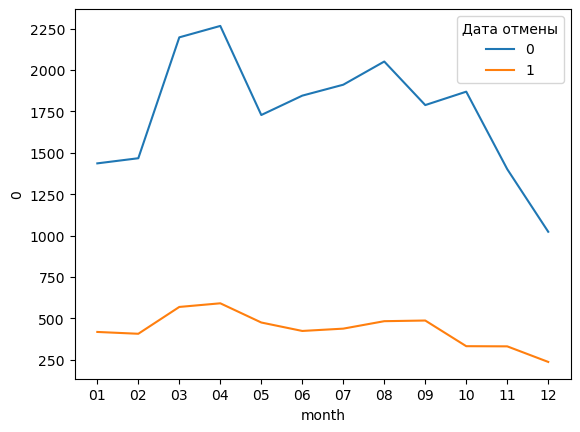

In [16]:
sns.lineplot(df_month, x ='month',y=0,hue = 'Дата отмены')

<Axes: xlabel='weekday', ylabel='0'>

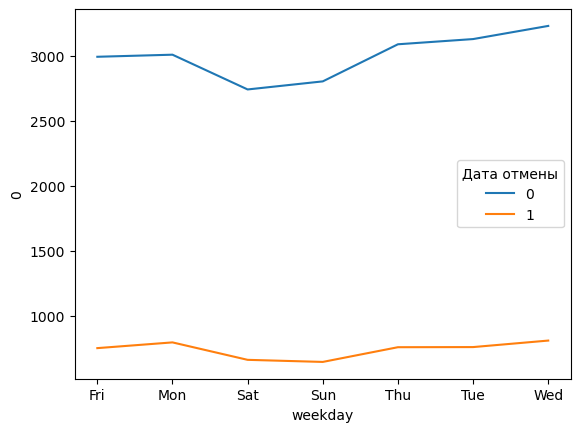

In [17]:
df_day = pd.DataFrame(df1.groupby(['weekday','Дата отмены'])
.size()
.reset_index())
sns.lineplot(df_day, x ='weekday',y=0,hue = 'Дата отмены')
#Тут приблизительно в одном разбросе 

In [18]:
inde = df1[df1['delta_day'] == -1].index
df1.loc[inde,'delta_day'] = 0

In [19]:
df1.drop(['weekday','Статус брони','№ брони'],axis = 1,inplace = True)

In [20]:
df1.head(5)

,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата отмены,Ночей,Источник,Категория номера,Гостей,Гостиница,month,delta_day,Year,Quartal
0,1,25700.0,0,Внешняя система оплаты,1,3,Яндекс.Путешествия,Номер «Стандарт»,2,1,04,7,2023,2
1,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,0,2,Официальный сайт,Номер «Стандарт»,2,1,06,23,2022,2
2,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),0,2,Официальный сайт,Номер «Студия»,2,4,11,19,2022,4
3,1,10500.0,0,Внешняя система оплаты (С предоплатой),0,1,Bronevik.com(new),Номер «Стандарт»,1,3,09,9,2023,3
4,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,0,2,Официальный сайт,Номер «Люкс»,4,1,05,8,2023,2


In [21]:
df1.groupby(["Quartal",'Дата отмены']).size()

Quartal  Дата отмены
1        0              5100
         1              1394
2        0              5839
         1              1490
3        0              5750
         1              1408
4        0              4293
         1               900
dtype: int64

# Тут год ничего не даёт

In [22]:
df1.groupby(['Year','Дата отмены']).size()

Year  Дата отмены
2022  0              10509
      1               2692
2023  0              10473
      1               2500
dtype: int64

In [23]:
df1.rename(columns = {'Источник':'Source'}, inplace = True )

In [24]:
s = df1.Source.value_counts()

In [25]:
df1['source_count'] = df1['Source'].map(s)

In [26]:
df1.loc[df1['Source'] == "Официальный сайт", "Source"] = "official_website"
df1.loc[df1['Source'] == "booking.com (Booking.com)", "Source"] = "booking.com"
df1.loc[df1['Source'] == "Bronevik.com/Bro.Online", "Source"] = "Bronevik.com(new)"
df1.loc[df1['source_count'] <= 200, 'Source'] = 'small_online_service'
# Вот тут пригодится

In [27]:
df1.drop(['source_count','Year'],axis = 1,inplace =True)

In [28]:
df1.head(10)

,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата отмены,Ночей,Source,Категория номера,Гостей,Гостиница,month,delta_day,Quartal
0,1,25700.0,0,Внешняя система оплаты,1,3,Яндекс.Путешествия,Номер «Стандарт»,2,1,04,7,2
1,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,0,2,official_website,Номер «Стандарт»,2,1,06,23,2
2,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),0,2,official_website,Номер «Студия»,2,4,11,19,4
3,1,10500.0,0,Внешняя система оплаты (С предоплатой),0,1,small_online_service,Номер «Стандарт»,1,3,09,9,3
4,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,0,2,official_website,Номер «Люкс»,4,1,05,8,2
5,1,39100.0,8755,Банк. карта: Банк Россия (банк. карта),1,4,official_website,Номер «Стандарт»,3,3,08,20,3
6,1,7650.0,0,Гарантия банковской картой,1,1,booking.com,Номер «Стандарт»,1,2,02,2,1
7,1,26200.0,0,Внешняя система оплаты (Оплата наличными),0,2,small_online_service,Номер «Стандарт»,2,3,08,22,3
8,1,14400.0,0,Отложенная электронная оплата: Банк Россия (ба...,1,1,official_website,Номер «Стандарт»,2,3,06,12,2
9,1,11200.0,6700,Банк. карта: Банк Россия (банк. карта),0,1,official_website,Номер «Стандарт»,2,1,11,85,4


# Гостиницы

In [29]:
pd.DataFrame(df1.groupby(['Гостиница','Дата отмены']).size()).rename({0:'count'},axis =1)

count
Гостиница Дата отмены       
1         0             6798
          1             1685
2         0             5969
          1             1399
3         0             6424
          1             1582
4         0             1791
          1              526

In [30]:
df1.describe()

,Номеров,Стоимость,Внесена предоплата,Дата отмены,Ночей,Гостей,Гостиница,delta_day,Quartal
count,26174.000000,26174.000000,26174.000000,26174.000000,26174.000000,26174.000000,26174.000000,26174.000000,26174.000000
mean,1.088714,35099.784232,19536.728165,0.198365,2.151295,2.601628,2.158822,28.101933,2.422175
std,0.341145,38849.552238,27776.602024,0.398776,1.456076,1.199428,0.979224,32.537671,1.066307
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,14300.000000,7800.000000,0.000000,1.000000,2.000000,1.000000,5.000000,2.000000
50%,1.000000,23800.000000,13900.000000,0.000000,2.000000,2.000000,2.000000,17.000000,2.000000
75%,1.000000,41100.000000,23180.000000,0.000000,3.000000,3.000000,3.000000,39.000000,3.000000
max,6.000000,986400.000000,584500.000000,1.000000,31.000000,16.000000,4.000000,284.000000,4.000000


In [31]:
df1['% внесена предоплата к стоимости'] = (df['Внесена предоплата']/df['Стоимость']).apply(lambda x:round(x,2))

In [32]:
df1.drop('Внесена предоплата',axis = 1,inplace = True)

In [33]:
df1.head()

,Номеров,Стоимость,Способ оплаты,Дата отмены,Ночей,Source,Категория номера,Гостей,Гостиница,month,delta_day,Quartal,% внесена предоплата к стоимости
0,1,25700.0,Внешняя система оплаты,1,3,Яндекс.Путешествия,Номер «Стандарт»,2,1,04,7,2,0.0
1,1,24800.0,Отложенная электронная оплата: Банк Россия (ба...,0,2,official_website,Номер «Стандарт»,2,1,06,23,2,0.5
2,1,25800.0,Банк. карта: Банк Россия (банк. карта),0,2,official_website,Номер «Студия»,2,4,11,19,4,0.5
3,1,10500.0,Внешняя система оплаты (С предоплатой),0,1,small_online_service,Номер «Стандарт»,1,3,09,9,3,0.0
4,1,28690.0,Система быстрых платежей: Эквайринг ComfortBoo...,0,2,official_website,Номер «Люкс»,4,1,05,8,2,1.0


In [34]:
df1.groupby(['Гостей','Дата отмены']).size() #Гостей поменять на категориальную 

Гостей  Дата отмены
1       0               1256
        1                356
2       0              12282
        1               2833
3       0               3708
        1                972
4       0               2471
        1                683
5       0                652
        1                160
6       0                349
        1                 95
7       0                118
        1                 43
8       0                 92
        1                 26
9       0                 20
        1                  6
10      0                 25
        1                  9
11      0                  3
        1                  1
12      0                  2
        1                  4
13      0                  1
        1                  2
14      0                  2
        1                  1
15      1                  1
16      0                  1
dtype: int64

In [35]:
def obid(x):
    if x >= 8:
        return 'Много гостей'
    elif x<8 and x >= 5:
        return 'Среднее количество гостей'
    else:
        return 'Малое количество гостей'

In [36]:
df1['колво-гостей'] = df1['Гостей'].apply(obid)
df2 = df1.drop('Гостей',axis=1)

In [37]:
df2.head(10)

,Номеров,Стоимость,Способ оплаты,Дата отмены,Ночей,Source,Категория номера,Гостиница,month,delta_day,Quartal,% внесена предоплата к стоимости,колво-гостей
0,1,25700.0,Внешняя система оплаты,1,3,Яндекс.Путешествия,Номер «Стандарт»,1,04,7,2,0.00,Малое количество гостей
1,1,24800.0,Отложенная электронная оплата: Банк Россия (ба...,0,2,official_website,Номер «Стандарт»,1,06,23,2,0.50,Малое количество гостей
2,1,25800.0,Банк. карта: Банк Россия (банк. карта),0,2,official_website,Номер «Студия»,4,11,19,4,0.50,Малое количество гостей
3,1,10500.0,Внешняя система оплаты (С предоплатой),0,1,small_online_service,Номер «Стандарт»,3,09,9,3,0.00,Малое количество гостей
4,1,28690.0,Система быстрых платежей: Эквайринг ComfortBoo...,0,2,official_website,Номер «Люкс»,1,05,8,2,1.00,Малое количество гостей
5,1,39100.0,Банк. карта: Банк Россия (банк. карта),1,4,official_website,Номер «Стандарт»,3,08,20,3,0.22,Малое количество гостей
6,1,7650.0,Гарантия банковской картой,1,1,booking.com,Номер «Стандарт»,2,02,2,1,0.00,Малое количество гостей
7,1,26200.0,Внешняя система оплаты (Оплата наличными),0,2,small_online_service,Номер «Стандарт»,3,08,22,3,0.00,Малое количество гостей
8,1,14400.0,Отложенная электронная оплата: Банк Россия (ба...,1,1,official_website,Номер «Стандарт»,3,06,12,2,0.00,Малое количество гостей
9,1,11200.0,Банк. карта: Банк Россия (банк. карта),0,1,official_website,Номер «Стандарт»,1,11,85,4,0.60,Малое количество гостей


In [38]:
df2.rename(columns = {'Категория номера':'Room_category'}, inplace = True )

In [39]:
total_rooms = df2['Room_category'].value_counts()
room_percent = (total_rooms / total_rooms.sum()) * 100

df2['Room_category'] = df2['Room_category'].apply(lambda x: x if (total_rooms[x] / total_rooms.sum()) * 100 >= 1 else 'other')

In [40]:
df2.rename(columns = {'Способ оплаты':'Payment'}, inplace = True )

In [41]:
total_payment = df2['Payment'].value_counts()
payment_percent = (total_payment / total_payment.sum()) * 100

df2['Payment'] = df2['Payment'].apply(lambda x: x if (total_payment[x] / total_payment.sum()) * 100 >= 1 else 'other')

In [49]:
def reg(x):
    if x in [1,2]:
        return 1
    else:
        return 0
df2['Регионы'] = df2['Гостиница'].apply(reg)
df2.drop('Гостиница',axis =1,inplace=True)

In [51]:
df0 = pd.get_dummies(df2,columns = ['Source','month','Payment','Room_category','колво-гостей','Quartal'],drop_first=True,dtype = int)

In [52]:
df0

,Номеров,Стоимость,Дата отмены,Ночей,delta_day,% внесена предоплата к стоимости,Регионы,Source_official_website,Source_ostrovok.ru,Source_small_online_service,...,Room_category_Коттедж с 2 спальнями,Room_category_Коттедж с 3 спальнями,Room_category_Номер «Люкс»,Room_category_Номер «Стандарт»,Room_category_Номер «Студия»,колво-гостей_Много гостей,колво-гостей_Среднее количество гостей,Quartal_2,Quartal_3,Quartal_4
0,1,25700.0,1,3,7,0.00,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,24800.0,0,2,23,0.50,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,1,25800.0,0,2,19,0.50,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1,10500.0,0,1,9,0.00,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,1,28690.0,0,2,8,1.00,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,1,18240.0,0,2,61,0.50,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
26170,1,69600.0,0,3,4,0.33,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
26171,1,55600.0,0,4,46,0.25,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
26172,1,6300.0,1,1,67,0.00,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [56]:
rf.fit(df0.drop('Дата отмены',axis = 1),df0['Дата отмены'])

RandomForestClassifier()

In [65]:
feature = pd.DataFrame({'name':df0.drop('Дата отмены',axis = 1).columns,'featue':rf.feature_importances_}).sort_values('featue',ascending = False)

In [72]:
feat = list(feature.loc[feature['featue']>0.01,'name'])

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X = df0[feat]
y = df0['Дата отмены']

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [78]:
from catboost import CatBoostClassifier, CatBoostRegressor, Pool

cat_features  = ['Source','month','Payment','Room_category','колво-гостей','Quartal','Гостиница']
train_data = Pool(X_train, 
                  label=y_train, 
                  cat_features=cat_features)

test_data = Pool(X_test, 
                  label=y_test, 
                  cat_features=cat_features)

In [79]:
from sklearn.metrics import roc_auc_score

In [80]:
from sklearn.model_selection import GridSearchCV

In [84]:
model = CatBoostClassifier(learning_rate=0.005,iterations = 3657,depth = 4,l2_leaf_reg= 3,eval_metric='AUC')

In [85]:
model.fit(X_train,y_train, eval_set = (X_test,y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8005250	best: 0.8005250 (0)	total: 8.99ms	remaining: 32.9s
1:	test: 0.8395910	best: 0.8395910 (1)	total: 18ms	remaining: 33s
2:	test: 0.8473444	best: 0.8473444 (2)	total: 26.5ms	remaining: 32.3s
3:	test: 0.8467215	best: 0.8473444 (2)	total: 35.4ms	remaining: 32.3s
4:	test: 0.8487473	best: 0.8487473 (4)	total: 42.1ms	remaining: 30.8s
5:	test: 0.8493588	best: 0.8493588 (5)	total: 49.1ms	remaining: 29.9s
6:	test: 0.8475640	best: 0.8493588 (5)	total: 57.3ms	remaining: 29.9s
7:	test: 0.8470168	best: 0.8493588 (5)	total: 65.6ms	remaining: 29.9s
8:	test: 0.8464227	best: 0.8493588 (5)	total: 73.9ms	remaining: 30s
9:	test: 0.8480347	best: 0.8493588 (5)	total: 82.1ms	remaining: 30s
10:	test: 0.8471514	best: 0.8493588 (5)	total: 88.8ms	remaining: 29.4s
11:	test: 0.8463503	best: 0.8493588 (5)	total: 95.3ms	remaining: 28.9s
12:	test: 0.8468435	best: 0.8493588 (5)	total: 102ms	remaining: 28.7s
13:	test: 0.8477508	best: 0.8493588 (5)	total: 109ms	remaining: 28.4s
14:	test: 0.8475039	best: 

132:	test: 0.8533676	best: 0.8533676 (132)	total: 1.03s	remaining: 27.4s
133:	test: 0.8533439	best: 0.8533676 (132)	total: 1.04s	remaining: 27.4s
134:	test: 0.8533484	best: 0.8533676 (132)	total: 1.05s	remaining: 27.4s
135:	test: 0.8534180	best: 0.8534180 (135)	total: 1.06s	remaining: 27.4s
136:	test: 0.8535133	best: 0.8535133 (136)	total: 1.07s	remaining: 27.5s
137:	test: 0.8535747	best: 0.8535747 (137)	total: 1.08s	remaining: 27.5s
138:	test: 0.8535943	best: 0.8535943 (138)	total: 1.08s	remaining: 27.5s
139:	test: 0.8535416	best: 0.8535943 (138)	total: 1.09s	remaining: 27.5s
140:	test: 0.8535052	best: 0.8535943 (138)	total: 1.1s	remaining: 27.5s
141:	test: 0.8535354	best: 0.8535943 (138)	total: 1.11s	remaining: 27.5s
142:	test: 0.8536286	best: 0.8536286 (142)	total: 1.12s	remaining: 27.5s
143:	test: 0.8537444	best: 0.8537444 (143)	total: 1.13s	remaining: 27.5s
144:	test: 0.8536759	best: 0.8537444 (143)	total: 1.13s	remaining: 27.5s
145:	test: 0.8536721	best: 0.8537444 (143)	total: 1.

259:	test: 0.8564166	best: 0.8564166 (259)	total: 2.04s	remaining: 26.6s
260:	test: 0.8563962	best: 0.8564166 (259)	total: 2.04s	remaining: 26.6s
261:	test: 0.8563574	best: 0.8564166 (259)	total: 2.05s	remaining: 26.6s
262:	test: 0.8563396	best: 0.8564166 (259)	total: 2.06s	remaining: 26.6s
263:	test: 0.8563853	best: 0.8564166 (259)	total: 2.07s	remaining: 26.6s
264:	test: 0.8563853	best: 0.8564166 (259)	total: 2.08s	remaining: 26.6s
265:	test: 0.8563990	best: 0.8564166 (259)	total: 2.09s	remaining: 26.6s
266:	test: 0.8563908	best: 0.8564166 (259)	total: 2.09s	remaining: 26.6s
267:	test: 0.8564013	best: 0.8564166 (259)	total: 2.1s	remaining: 26.6s
268:	test: 0.8564232	best: 0.8564232 (268)	total: 2.11s	remaining: 26.6s
269:	test: 0.8564248	best: 0.8564248 (269)	total: 2.12s	remaining: 26.6s
270:	test: 0.8564469	best: 0.8564469 (270)	total: 2.13s	remaining: 26.6s
271:	test: 0.8564651	best: 0.8564651 (271)	total: 2.13s	remaining: 26.5s
272:	test: 0.8564735	best: 0.8564735 (272)	total: 2.

372:	test: 0.8581808	best: 0.8581808 (372)	total: 2.88s	remaining: 25.3s
373:	test: 0.8581887	best: 0.8581887 (373)	total: 2.89s	remaining: 25.4s
374:	test: 0.8582262	best: 0.8582262 (374)	total: 2.9s	remaining: 25.4s
375:	test: 0.8582231	best: 0.8582262 (374)	total: 2.91s	remaining: 25.4s
376:	test: 0.8582334	best: 0.8582334 (376)	total: 2.91s	remaining: 25.4s
377:	test: 0.8582302	best: 0.8582334 (376)	total: 2.92s	remaining: 25.4s
378:	test: 0.8582460	best: 0.8582460 (378)	total: 2.93s	remaining: 25.4s
379:	test: 0.8582644	best: 0.8582644 (379)	total: 2.94s	remaining: 25.3s
380:	test: 0.8583068	best: 0.8583068 (380)	total: 2.95s	remaining: 25.3s
381:	test: 0.8583193	best: 0.8583193 (381)	total: 2.96s	remaining: 25.3s
382:	test: 0.8583393	best: 0.8583393 (382)	total: 2.96s	remaining: 25.3s
383:	test: 0.8583519	best: 0.8583519 (383)	total: 2.97s	remaining: 25.3s
384:	test: 0.8583613	best: 0.8583613 (384)	total: 2.98s	remaining: 25.3s
385:	test: 0.8583734	best: 0.8583734 (385)	total: 2.

502:	test: 0.8599023	best: 0.8599023 (502)	total: 3.93s	remaining: 24.7s
503:	test: 0.8599104	best: 0.8599104 (503)	total: 3.94s	remaining: 24.7s
504:	test: 0.8599244	best: 0.8599244 (504)	total: 3.95s	remaining: 24.7s
505:	test: 0.8599296	best: 0.8599296 (505)	total: 3.96s	remaining: 24.7s
506:	test: 0.8599337	best: 0.8599337 (506)	total: 3.97s	remaining: 24.7s
507:	test: 0.8599390	best: 0.8599390 (507)	total: 3.98s	remaining: 24.7s
508:	test: 0.8599450	best: 0.8599450 (508)	total: 3.99s	remaining: 24.7s
509:	test: 0.8599460	best: 0.8599460 (509)	total: 4s	remaining: 24.7s
510:	test: 0.8599635	best: 0.8599635 (510)	total: 4.01s	remaining: 24.7s
511:	test: 0.8599706	best: 0.8599706 (511)	total: 4.02s	remaining: 24.7s
512:	test: 0.8599832	best: 0.8599832 (512)	total: 4.03s	remaining: 24.7s
513:	test: 0.8600048	best: 0.8600048 (513)	total: 4.04s	remaining: 24.7s
514:	test: 0.8600141	best: 0.8600141 (514)	total: 4.05s	remaining: 24.7s
515:	test: 0.8600254	best: 0.8600254 (515)	total: 4.06

618:	test: 0.8607602	best: 0.8607602 (618)	total: 4.97s	remaining: 24.4s
619:	test: 0.8607640	best: 0.8607640 (619)	total: 4.98s	remaining: 24.4s
620:	test: 0.8607655	best: 0.8607655 (620)	total: 4.99s	remaining: 24.4s
621:	test: 0.8607882	best: 0.8607882 (621)	total: 5s	remaining: 24.4s
622:	test: 0.8607921	best: 0.8607921 (622)	total: 5.03s	remaining: 24.5s
623:	test: 0.8607977	best: 0.8607977 (623)	total: 5.04s	remaining: 24.5s
624:	test: 0.8608228	best: 0.8608228 (624)	total: 5.04s	remaining: 24.5s
625:	test: 0.8608259	best: 0.8608259 (625)	total: 5.05s	remaining: 24.5s
626:	test: 0.8608220	best: 0.8608259 (625)	total: 5.06s	remaining: 24.5s
627:	test: 0.8608185	best: 0.8608259 (625)	total: 5.07s	remaining: 24.5s
628:	test: 0.8608262	best: 0.8608262 (628)	total: 5.08s	remaining: 24.5s
629:	test: 0.8608619	best: 0.8608619 (629)	total: 5.09s	remaining: 24.4s
630:	test: 0.8608604	best: 0.8608619 (629)	total: 5.1s	remaining: 24.4s
631:	test: 0.8608655	best: 0.8608655 (631)	total: 5.11s

736:	test: 0.8613800	best: 0.8613899 (732)	total: 6.02s	remaining: 23.8s
737:	test: 0.8613732	best: 0.8613899 (732)	total: 6.03s	remaining: 23.8s
738:	test: 0.8613715	best: 0.8613899 (732)	total: 6.04s	remaining: 23.8s
739:	test: 0.8613699	best: 0.8613899 (732)	total: 6.05s	remaining: 23.8s
740:	test: 0.8613799	best: 0.8613899 (732)	total: 6.06s	remaining: 23.8s
741:	test: 0.8613870	best: 0.8613899 (732)	total: 6.07s	remaining: 23.8s
742:	test: 0.8613963	best: 0.8613963 (742)	total: 6.07s	remaining: 23.8s
743:	test: 0.8614025	best: 0.8614025 (743)	total: 6.08s	remaining: 23.8s
744:	test: 0.8614095	best: 0.8614095 (744)	total: 6.09s	remaining: 23.8s
745:	test: 0.8614135	best: 0.8614135 (745)	total: 6.1s	remaining: 23.8s
746:	test: 0.8614184	best: 0.8614184 (746)	total: 6.11s	remaining: 23.8s
747:	test: 0.8614255	best: 0.8614255 (747)	total: 6.12s	remaining: 23.8s
748:	test: 0.8614362	best: 0.8614362 (748)	total: 6.13s	remaining: 23.8s
749:	test: 0.8614354	best: 0.8614362 (748)	total: 6.

853:	test: 0.8619544	best: 0.8619544 (853)	total: 7.04s	remaining: 23.1s
854:	test: 0.8619612	best: 0.8619612 (854)	total: 7.05s	remaining: 23.1s
855:	test: 0.8619645	best: 0.8619645 (855)	total: 7.06s	remaining: 23.1s
856:	test: 0.8619820	best: 0.8619820 (856)	total: 7.07s	remaining: 23.1s
857:	test: 0.8619808	best: 0.8619820 (856)	total: 7.07s	remaining: 23.1s
858:	test: 0.8619851	best: 0.8619851 (858)	total: 7.08s	remaining: 23.1s
859:	test: 0.8619901	best: 0.8619901 (859)	total: 7.09s	remaining: 23.1s
860:	test: 0.8620012	best: 0.8620012 (860)	total: 7.1s	remaining: 23s
861:	test: 0.8620161	best: 0.8620161 (861)	total: 7.1s	remaining: 23s
862:	test: 0.8620193	best: 0.8620193 (862)	total: 7.11s	remaining: 23s
863:	test: 0.8620137	best: 0.8620193 (862)	total: 7.12s	remaining: 23s
864:	test: 0.8620215	best: 0.8620215 (864)	total: 7.13s	remaining: 23s
865:	test: 0.8620194	best: 0.8620215 (864)	total: 7.14s	remaining: 23s
866:	test: 0.8620228	best: 0.8620228 (866)	total: 7.14s	remaining

976:	test: 0.8624032	best: 0.8624056 (975)	total: 8.06s	remaining: 22.1s
977:	test: 0.8624106	best: 0.8624106 (977)	total: 8.07s	remaining: 22.1s
978:	test: 0.8624140	best: 0.8624140 (978)	total: 8.08s	remaining: 22.1s
979:	test: 0.8624260	best: 0.8624260 (979)	total: 8.09s	remaining: 22.1s
980:	test: 0.8624263	best: 0.8624263 (980)	total: 8.1s	remaining: 22.1s
981:	test: 0.8624298	best: 0.8624298 (981)	total: 8.11s	remaining: 22.1s
982:	test: 0.8624279	best: 0.8624298 (981)	total: 8.11s	remaining: 22.1s
983:	test: 0.8624313	best: 0.8624313 (983)	total: 8.12s	remaining: 22.1s
984:	test: 0.8624317	best: 0.8624317 (984)	total: 8.13s	remaining: 22.1s
985:	test: 0.8624319	best: 0.8624319 (985)	total: 8.14s	remaining: 22s
986:	test: 0.8624339	best: 0.8624339 (986)	total: 8.14s	remaining: 22s
987:	test: 0.8624367	best: 0.8624367 (987)	total: 8.15s	remaining: 22s
988:	test: 0.8624405	best: 0.8624405 (988)	total: 8.16s	remaining: 22s
989:	test: 0.8624395	best: 0.8624405 (988)	total: 8.17s	rema

1088:	test: 0.8625533	best: 0.8625536 (1087)	total: 8.91s	remaining: 21s
1089:	test: 0.8625570	best: 0.8625570 (1089)	total: 8.92s	remaining: 21s
1090:	test: 0.8625567	best: 0.8625570 (1089)	total: 8.93s	remaining: 21s
1091:	test: 0.8625630	best: 0.8625630 (1091)	total: 8.94s	remaining: 21s
1092:	test: 0.8625633	best: 0.8625633 (1092)	total: 8.95s	remaining: 21s
1093:	test: 0.8625598	best: 0.8625633 (1092)	total: 8.95s	remaining: 21s
1094:	test: 0.8625627	best: 0.8625633 (1092)	total: 8.96s	remaining: 21s
1095:	test: 0.8625583	best: 0.8625633 (1092)	total: 8.97s	remaining: 21s
1096:	test: 0.8625636	best: 0.8625636 (1096)	total: 8.98s	remaining: 20.9s
1097:	test: 0.8625802	best: 0.8625802 (1097)	total: 8.98s	remaining: 20.9s
1098:	test: 0.8625875	best: 0.8625875 (1098)	total: 8.99s	remaining: 20.9s
1099:	test: 0.8625951	best: 0.8625951 (1099)	total: 9s	remaining: 20.9s
1100:	test: 0.8625955	best: 0.8625955 (1100)	total: 9.01s	remaining: 20.9s
1101:	test: 0.8625959	best: 0.8625959 (1101)

1220:	test: 0.8628237	best: 0.8628248 (1219)	total: 9.95s	remaining: 19.8s
1221:	test: 0.8628193	best: 0.8628248 (1219)	total: 9.96s	remaining: 19.8s
1222:	test: 0.8628187	best: 0.8628248 (1219)	total: 9.96s	remaining: 19.8s
1223:	test: 0.8628220	best: 0.8628248 (1219)	total: 9.97s	remaining: 19.8s
1224:	test: 0.8628255	best: 0.8628255 (1224)	total: 9.98s	remaining: 19.8s
1225:	test: 0.8628232	best: 0.8628255 (1224)	total: 9.99s	remaining: 19.8s
1226:	test: 0.8628266	best: 0.8628266 (1226)	total: 9.99s	remaining: 19.8s
1227:	test: 0.8628283	best: 0.8628283 (1227)	total: 10s	remaining: 19.8s
1228:	test: 0.8628237	best: 0.8628283 (1227)	total: 10s	remaining: 19.8s
1229:	test: 0.8628176	best: 0.8628283 (1227)	total: 10s	remaining: 19.8s
1230:	test: 0.8628142	best: 0.8628283 (1227)	total: 10s	remaining: 19.8s
1231:	test: 0.8628189	best: 0.8628283 (1227)	total: 10s	remaining: 19.7s
1232:	test: 0.8628173	best: 0.8628283 (1227)	total: 10s	remaining: 19.7s
1233:	test: 0.8628190	best: 0.8628283

1354:	test: 0.8630091	best: 0.8630091 (1354)	total: 11s	remaining: 18.7s
1355:	test: 0.8630219	best: 0.8630219 (1355)	total: 11s	remaining: 18.6s
1356:	test: 0.8630231	best: 0.8630231 (1356)	total: 11s	remaining: 18.6s
1357:	test: 0.8630263	best: 0.8630263 (1357)	total: 11s	remaining: 18.6s
1358:	test: 0.8630272	best: 0.8630272 (1358)	total: 11s	remaining: 18.6s
1359:	test: 0.8630225	best: 0.8630272 (1358)	total: 11s	remaining: 18.6s
1360:	test: 0.8630260	best: 0.8630272 (1358)	total: 11s	remaining: 18.6s
1361:	test: 0.8630260	best: 0.8630272 (1358)	total: 11s	remaining: 18.6s
1362:	test: 0.8630240	best: 0.8630272 (1358)	total: 11s	remaining: 18.6s
1363:	test: 0.8630247	best: 0.8630272 (1358)	total: 11.1s	remaining: 18.6s
1364:	test: 0.8630226	best: 0.8630272 (1358)	total: 11.1s	remaining: 18.6s
1365:	test: 0.8630302	best: 0.8630302 (1365)	total: 11.1s	remaining: 18.6s
1366:	test: 0.8630299	best: 0.8630302 (1365)	total: 11.1s	remaining: 18.5s
1367:	test: 0.8630334	best: 0.8630334 (1367

1483:	test: 0.8632313	best: 0.8632313 (1483)	total: 12s	remaining: 17.6s
1484:	test: 0.8632325	best: 0.8632325 (1484)	total: 12s	remaining: 17.6s
1485:	test: 0.8632293	best: 0.8632325 (1484)	total: 12s	remaining: 17.5s
1486:	test: 0.8632399	best: 0.8632399 (1486)	total: 12s	remaining: 17.5s
1487:	test: 0.8632517	best: 0.8632517 (1487)	total: 12s	remaining: 17.5s
1488:	test: 0.8632492	best: 0.8632517 (1487)	total: 12s	remaining: 17.5s
1489:	test: 0.8632446	best: 0.8632517 (1487)	total: 12s	remaining: 17.5s
1490:	test: 0.8632459	best: 0.8632517 (1487)	total: 12s	remaining: 17.5s
1491:	test: 0.8632445	best: 0.8632517 (1487)	total: 12.1s	remaining: 17.5s
1492:	test: 0.8632431	best: 0.8632517 (1487)	total: 12.1s	remaining: 17.5s
1493:	test: 0.8632439	best: 0.8632517 (1487)	total: 12.1s	remaining: 17.5s
1494:	test: 0.8632458	best: 0.8632517 (1487)	total: 12.1s	remaining: 17.5s
1495:	test: 0.8632378	best: 0.8632517 (1487)	total: 12.1s	remaining: 17.5s
1496:	test: 0.8632461	best: 0.8632517 (14

1602:	test: 0.8634097	best: 0.8634097 (1602)	total: 13s	remaining: 16.7s
1603:	test: 0.8634043	best: 0.8634097 (1602)	total: 13s	remaining: 16.7s
1604:	test: 0.8634116	best: 0.8634116 (1604)	total: 13s	remaining: 16.7s
1605:	test: 0.8634124	best: 0.8634124 (1605)	total: 13s	remaining: 16.6s
1606:	test: 0.8634128	best: 0.8634128 (1606)	total: 13s	remaining: 16.6s
1607:	test: 0.8634134	best: 0.8634134 (1607)	total: 13.1s	remaining: 16.6s
1608:	test: 0.8634149	best: 0.8634149 (1608)	total: 13.1s	remaining: 16.6s
1609:	test: 0.8634085	best: 0.8634149 (1608)	total: 13.1s	remaining: 16.6s
1610:	test: 0.8634020	best: 0.8634149 (1608)	total: 13.1s	remaining: 16.6s
1611:	test: 0.8633945	best: 0.8634149 (1608)	total: 13.1s	remaining: 16.6s
1612:	test: 0.8633982	best: 0.8634149 (1608)	total: 13.1s	remaining: 16.6s
1613:	test: 0.8633991	best: 0.8634149 (1608)	total: 13.1s	remaining: 16.6s
1614:	test: 0.8634017	best: 0.8634149 (1608)	total: 13.1s	remaining: 16.6s
1615:	test: 0.8633987	best: 0.86341

1734:	test: 0.8635393	best: 0.8635451 (1731)	total: 14.1s	remaining: 15.6s
1735:	test: 0.8635418	best: 0.8635451 (1731)	total: 14.1s	remaining: 15.6s
1736:	test: 0.8635405	best: 0.8635451 (1731)	total: 14.1s	remaining: 15.6s
1737:	test: 0.8635410	best: 0.8635451 (1731)	total: 14.1s	remaining: 15.6s
1738:	test: 0.8635390	best: 0.8635451 (1731)	total: 14.1s	remaining: 15.5s
1739:	test: 0.8635367	best: 0.8635451 (1731)	total: 14.1s	remaining: 15.5s
1740:	test: 0.8635408	best: 0.8635451 (1731)	total: 14.1s	remaining: 15.5s
1741:	test: 0.8635442	best: 0.8635451 (1731)	total: 14.1s	remaining: 15.5s
1742:	test: 0.8635464	best: 0.8635464 (1742)	total: 14.1s	remaining: 15.5s
1743:	test: 0.8635472	best: 0.8635472 (1743)	total: 14.1s	remaining: 15.5s
1744:	test: 0.8635458	best: 0.8635472 (1743)	total: 14.1s	remaining: 15.5s
1745:	test: 0.8635531	best: 0.8635531 (1745)	total: 14.1s	remaining: 15.5s
1746:	test: 0.8635547	best: 0.8635547 (1746)	total: 14.2s	remaining: 15.5s
1747:	test: 0.8635526	bes

1859:	test: 0.8636105	best: 0.8636151 (1856)	total: 15.1s	remaining: 14.6s
1860:	test: 0.8636129	best: 0.8636151 (1856)	total: 15.1s	remaining: 14.6s
1861:	test: 0.8636120	best: 0.8636151 (1856)	total: 15.1s	remaining: 14.6s
1862:	test: 0.8636121	best: 0.8636151 (1856)	total: 15.1s	remaining: 14.6s
1863:	test: 0.8636164	best: 0.8636164 (1863)	total: 15.1s	remaining: 14.5s
1864:	test: 0.8636139	best: 0.8636164 (1863)	total: 15.1s	remaining: 14.5s
1865:	test: 0.8636129	best: 0.8636164 (1863)	total: 15.1s	remaining: 14.5s
1866:	test: 0.8636096	best: 0.8636164 (1863)	total: 15.1s	remaining: 14.5s
1867:	test: 0.8636111	best: 0.8636164 (1863)	total: 15.2s	remaining: 14.5s
1868:	test: 0.8636132	best: 0.8636164 (1863)	total: 15.2s	remaining: 14.5s
1869:	test: 0.8636176	best: 0.8636176 (1869)	total: 15.2s	remaining: 14.5s
1870:	test: 0.8636214	best: 0.8636214 (1870)	total: 15.2s	remaining: 14.5s
1871:	test: 0.8636229	best: 0.8636229 (1871)	total: 15.2s	remaining: 14.5s
1872:	test: 0.8636291	bes

1974:	test: 0.8637628	best: 0.8637651 (1973)	total: 16.1s	remaining: 13.7s
1975:	test: 0.8637669	best: 0.8637669 (1975)	total: 16.1s	remaining: 13.7s
1976:	test: 0.8637718	best: 0.8637718 (1976)	total: 16.1s	remaining: 13.7s
1977:	test: 0.8637662	best: 0.8637718 (1976)	total: 16.1s	remaining: 13.7s
1978:	test: 0.8637697	best: 0.8637718 (1976)	total: 16.1s	remaining: 13.7s
1979:	test: 0.8637693	best: 0.8637718 (1976)	total: 16.1s	remaining: 13.7s
1980:	test: 0.8637721	best: 0.8637721 (1980)	total: 16.1s	remaining: 13.7s
1981:	test: 0.8637699	best: 0.8637721 (1980)	total: 16.1s	remaining: 13.6s
1982:	test: 0.8637755	best: 0.8637755 (1982)	total: 16.2s	remaining: 13.6s
1983:	test: 0.8637823	best: 0.8637823 (1983)	total: 16.2s	remaining: 13.6s
1984:	test: 0.8637786	best: 0.8637823 (1983)	total: 16.2s	remaining: 13.6s
1985:	test: 0.8637801	best: 0.8637823 (1983)	total: 16.2s	remaining: 13.6s
1986:	test: 0.8637784	best: 0.8637823 (1983)	total: 16.2s	remaining: 13.6s
1987:	test: 0.8637801	bes

2094:	test: 0.8638810	best: 0.8638810 (2094)	total: 17.1s	remaining: 12.7s
2095:	test: 0.8638879	best: 0.8638879 (2095)	total: 17.1s	remaining: 12.7s
2096:	test: 0.8638845	best: 0.8638879 (2095)	total: 17.1s	remaining: 12.7s
2097:	test: 0.8638858	best: 0.8638879 (2095)	total: 17.1s	remaining: 12.7s
2098:	test: 0.8638889	best: 0.8638889 (2098)	total: 17.1s	remaining: 12.7s
2099:	test: 0.8638835	best: 0.8638889 (2098)	total: 17.1s	remaining: 12.7s
2100:	test: 0.8638833	best: 0.8638889 (2098)	total: 17.1s	remaining: 12.7s
2101:	test: 0.8638841	best: 0.8638889 (2098)	total: 17.1s	remaining: 12.7s
2102:	test: 0.8638858	best: 0.8638889 (2098)	total: 17.1s	remaining: 12.7s
2103:	test: 0.8638808	best: 0.8638889 (2098)	total: 17.1s	remaining: 12.7s
2104:	test: 0.8638802	best: 0.8638889 (2098)	total: 17.1s	remaining: 12.6s
2105:	test: 0.8638835	best: 0.8638889 (2098)	total: 17.2s	remaining: 12.6s
2106:	test: 0.8638860	best: 0.8638889 (2098)	total: 17.2s	remaining: 12.6s
2107:	test: 0.8638847	bes

2222:	test: 0.8640526	best: 0.8640526 (2222)	total: 18.2s	remaining: 11.7s
2223:	test: 0.8640537	best: 0.8640537 (2223)	total: 18.2s	remaining: 11.7s
2224:	test: 0.8640589	best: 0.8640589 (2224)	total: 18.2s	remaining: 11.7s
2225:	test: 0.8640588	best: 0.8640589 (2224)	total: 18.2s	remaining: 11.7s
2226:	test: 0.8640589	best: 0.8640589 (2224)	total: 18.2s	remaining: 11.7s
2227:	test: 0.8640636	best: 0.8640636 (2227)	total: 18.2s	remaining: 11.7s
2228:	test: 0.8640698	best: 0.8640698 (2228)	total: 18.2s	remaining: 11.7s
2229:	test: 0.8640703	best: 0.8640703 (2229)	total: 18.2s	remaining: 11.7s
2230:	test: 0.8640772	best: 0.8640772 (2230)	total: 18.2s	remaining: 11.6s
2231:	test: 0.8640785	best: 0.8640785 (2231)	total: 18.2s	remaining: 11.6s
2232:	test: 0.8640778	best: 0.8640785 (2231)	total: 18.2s	remaining: 11.6s
2233:	test: 0.8640743	best: 0.8640785 (2231)	total: 18.2s	remaining: 11.6s
2234:	test: 0.8640762	best: 0.8640785 (2231)	total: 18.2s	remaining: 11.6s
2235:	test: 0.8640810	bes

2350:	test: 0.8641869	best: 0.8641887 (2346)	total: 19.2s	remaining: 10.7s
2351:	test: 0.8641893	best: 0.8641893 (2351)	total: 19.2s	remaining: 10.7s
2352:	test: 0.8641873	best: 0.8641893 (2351)	total: 19.2s	remaining: 10.6s
2353:	test: 0.8641925	best: 0.8641925 (2353)	total: 19.2s	remaining: 10.6s
2354:	test: 0.8641899	best: 0.8641925 (2353)	total: 19.2s	remaining: 10.6s
2355:	test: 0.8641990	best: 0.8641990 (2355)	total: 19.2s	remaining: 10.6s
2356:	test: 0.8642065	best: 0.8642065 (2356)	total: 19.2s	remaining: 10.6s
2357:	test: 0.8642059	best: 0.8642065 (2356)	total: 19.3s	remaining: 10.6s
2358:	test: 0.8642061	best: 0.8642065 (2356)	total: 19.3s	remaining: 10.6s
2359:	test: 0.8642051	best: 0.8642065 (2356)	total: 19.3s	remaining: 10.6s
2360:	test: 0.8642084	best: 0.8642084 (2360)	total: 19.3s	remaining: 10.6s
2361:	test: 0.8642105	best: 0.8642105 (2361)	total: 19.3s	remaining: 10.6s
2362:	test: 0.8642124	best: 0.8642124 (2362)	total: 19.3s	remaining: 10.6s
2363:	test: 0.8642071	bes

2471:	test: 0.8642391	best: 0.8642503 (2454)	total: 20.2s	remaining: 9.69s
2472:	test: 0.8642437	best: 0.8642503 (2454)	total: 20.2s	remaining: 9.68s
2473:	test: 0.8642450	best: 0.8642503 (2454)	total: 20.2s	remaining: 9.67s
2474:	test: 0.8642518	best: 0.8642518 (2474)	total: 20.2s	remaining: 9.66s
2475:	test: 0.8642434	best: 0.8642518 (2474)	total: 20.2s	remaining: 9.65s
2476:	test: 0.8642434	best: 0.8642518 (2474)	total: 20.2s	remaining: 9.64s
2477:	test: 0.8642411	best: 0.8642518 (2474)	total: 20.3s	remaining: 9.64s
2478:	test: 0.8642411	best: 0.8642518 (2474)	total: 20.3s	remaining: 9.63s
2479:	test: 0.8642412	best: 0.8642518 (2474)	total: 20.3s	remaining: 9.62s
2480:	test: 0.8642430	best: 0.8642518 (2474)	total: 20.3s	remaining: 9.61s
2481:	test: 0.8642441	best: 0.8642518 (2474)	total: 20.3s	remaining: 9.6s
2482:	test: 0.8642440	best: 0.8642518 (2474)	total: 20.3s	remaining: 9.59s
2483:	test: 0.8642458	best: 0.8642518 (2474)	total: 20.3s	remaining: 9.59s
2484:	test: 0.8642470	best

2600:	test: 0.8643333	best: 0.8643333 (2599)	total: 21.3s	remaining: 8.63s
2601:	test: 0.8643322	best: 0.8643333 (2599)	total: 21.3s	remaining: 8.63s
2602:	test: 0.8643299	best: 0.8643333 (2599)	total: 21.3s	remaining: 8.62s
2603:	test: 0.8643396	best: 0.8643396 (2603)	total: 21.3s	remaining: 8.61s
2604:	test: 0.8643414	best: 0.8643414 (2604)	total: 21.3s	remaining: 8.6s
2605:	test: 0.8643406	best: 0.8643414 (2604)	total: 21.3s	remaining: 8.59s
2606:	test: 0.8643411	best: 0.8643414 (2604)	total: 21.3s	remaining: 8.58s
2607:	test: 0.8643411	best: 0.8643414 (2604)	total: 21.3s	remaining: 8.57s
2608:	test: 0.8643471	best: 0.8643471 (2608)	total: 21.3s	remaining: 8.57s
2609:	test: 0.8643437	best: 0.8643471 (2608)	total: 21.3s	remaining: 8.56s
2610:	test: 0.8643432	best: 0.8643471 (2608)	total: 21.3s	remaining: 8.55s
2611:	test: 0.8643434	best: 0.8643471 (2608)	total: 21.3s	remaining: 8.54s
2612:	test: 0.8643443	best: 0.8643471 (2608)	total: 21.4s	remaining: 8.53s
2613:	test: 0.8643399	best

2724:	test: 0.8644215	best: 0.8644215 (2724)	total: 22.3s	remaining: 7.63s
2725:	test: 0.8644233	best: 0.8644233 (2725)	total: 22.3s	remaining: 7.62s
2726:	test: 0.8644249	best: 0.8644249 (2726)	total: 22.3s	remaining: 7.61s
2727:	test: 0.8644286	best: 0.8644286 (2727)	total: 22.3s	remaining: 7.61s
2728:	test: 0.8644259	best: 0.8644286 (2727)	total: 22.3s	remaining: 7.6s
2729:	test: 0.8644243	best: 0.8644286 (2727)	total: 22.4s	remaining: 7.59s
2730:	test: 0.8644240	best: 0.8644286 (2727)	total: 22.4s	remaining: 7.58s
2731:	test: 0.8644249	best: 0.8644286 (2727)	total: 22.4s	remaining: 7.57s
2732:	test: 0.8644231	best: 0.8644286 (2727)	total: 22.4s	remaining: 7.56s
2733:	test: 0.8644243	best: 0.8644286 (2727)	total: 22.4s	remaining: 7.55s
2734:	test: 0.8644253	best: 0.8644286 (2727)	total: 22.4s	remaining: 7.55s
2735:	test: 0.8644268	best: 0.8644286 (2727)	total: 22.4s	remaining: 7.54s
2736:	test: 0.8644211	best: 0.8644286 (2727)	total: 22.4s	remaining: 7.53s
2737:	test: 0.8644258	best

2843:	test: 0.8645044	best: 0.8645115 (2839)	total: 23.3s	remaining: 6.65s
2844:	test: 0.8645071	best: 0.8645115 (2839)	total: 23.3s	remaining: 6.64s
2845:	test: 0.8645131	best: 0.8645131 (2845)	total: 23.3s	remaining: 6.64s
2846:	test: 0.8645096	best: 0.8645131 (2845)	total: 23.3s	remaining: 6.63s
2847:	test: 0.8645043	best: 0.8645131 (2845)	total: 23.3s	remaining: 6.62s
2848:	test: 0.8645038	best: 0.8645131 (2845)	total: 23.3s	remaining: 6.61s
2849:	test: 0.8645078	best: 0.8645131 (2845)	total: 23.3s	remaining: 6.6s
2850:	test: 0.8645088	best: 0.8645131 (2845)	total: 23.3s	remaining: 6.59s
2851:	test: 0.8645128	best: 0.8645131 (2845)	total: 23.3s	remaining: 6.59s
2852:	test: 0.8645119	best: 0.8645131 (2845)	total: 23.3s	remaining: 6.58s
2853:	test: 0.8645122	best: 0.8645131 (2845)	total: 23.4s	remaining: 6.57s
2854:	test: 0.8645116	best: 0.8645131 (2845)	total: 23.4s	remaining: 6.56s
2855:	test: 0.8645149	best: 0.8645149 (2855)	total: 23.4s	remaining: 6.55s
2856:	test: 0.8645137	best

2969:	test: 0.8644923	best: 0.8645466 (2899)	total: 24.3s	remaining: 5.63s
2970:	test: 0.8644885	best: 0.8645466 (2899)	total: 24.4s	remaining: 5.62s
2971:	test: 0.8644894	best: 0.8645466 (2899)	total: 24.4s	remaining: 5.62s
2972:	test: 0.8644886	best: 0.8645466 (2899)	total: 24.4s	remaining: 5.61s
2973:	test: 0.8644907	best: 0.8645466 (2899)	total: 24.4s	remaining: 5.6s
2974:	test: 0.8645021	best: 0.8645466 (2899)	total: 24.4s	remaining: 5.59s
2975:	test: 0.8645015	best: 0.8645466 (2899)	total: 24.4s	remaining: 5.58s
2976:	test: 0.8645041	best: 0.8645466 (2899)	total: 24.4s	remaining: 5.57s
2977:	test: 0.8644929	best: 0.8645466 (2899)	total: 24.4s	remaining: 5.57s
2978:	test: 0.8644950	best: 0.8645466 (2899)	total: 24.4s	remaining: 5.56s
2979:	test: 0.8644934	best: 0.8645466 (2899)	total: 24.4s	remaining: 5.55s
2980:	test: 0.8644934	best: 0.8645466 (2899)	total: 24.4s	remaining: 5.54s
2981:	test: 0.8644855	best: 0.8645466 (2899)	total: 24.4s	remaining: 5.53s
2982:	test: 0.8644852	best

3092:	test: 0.8645338	best: 0.8645518 (3087)	total: 25.4s	remaining: 4.63s
3093:	test: 0.8645324	best: 0.8645518 (3087)	total: 25.4s	remaining: 4.62s
3094:	test: 0.8645330	best: 0.8645518 (3087)	total: 25.4s	remaining: 4.61s
3095:	test: 0.8645357	best: 0.8645518 (3087)	total: 25.4s	remaining: 4.6s
3096:	test: 0.8645354	best: 0.8645518 (3087)	total: 25.4s	remaining: 4.59s
3097:	test: 0.8645364	best: 0.8645518 (3087)	total: 25.4s	remaining: 4.59s
3098:	test: 0.8645329	best: 0.8645518 (3087)	total: 25.4s	remaining: 4.58s
3099:	test: 0.8645364	best: 0.8645518 (3087)	total: 25.4s	remaining: 4.57s
3100:	test: 0.8645320	best: 0.8645518 (3087)	total: 25.4s	remaining: 4.56s
3101:	test: 0.8645348	best: 0.8645518 (3087)	total: 25.4s	remaining: 4.55s
3102:	test: 0.8645420	best: 0.8645518 (3087)	total: 25.5s	remaining: 4.54s
3103:	test: 0.8645460	best: 0.8645518 (3087)	total: 25.5s	remaining: 4.54s
3104:	test: 0.8645457	best: 0.8645518 (3087)	total: 25.5s	remaining: 4.53s
3105:	test: 0.8645494	best

3217:	test: 0.8645541	best: 0.8645800 (3165)	total: 26.4s	remaining: 3.6s
3218:	test: 0.8645524	best: 0.8645800 (3165)	total: 26.4s	remaining: 3.6s
3219:	test: 0.8645519	best: 0.8645800 (3165)	total: 26.4s	remaining: 3.59s
3220:	test: 0.8645499	best: 0.8645800 (3165)	total: 26.5s	remaining: 3.58s
3221:	test: 0.8645516	best: 0.8645800 (3165)	total: 26.5s	remaining: 3.57s
3222:	test: 0.8645443	best: 0.8645800 (3165)	total: 26.5s	remaining: 3.56s
3223:	test: 0.8645348	best: 0.8645800 (3165)	total: 26.5s	remaining: 3.56s
3224:	test: 0.8645245	best: 0.8645800 (3165)	total: 26.5s	remaining: 3.55s
3225:	test: 0.8645271	best: 0.8645800 (3165)	total: 26.5s	remaining: 3.54s
3226:	test: 0.8645296	best: 0.8645800 (3165)	total: 26.5s	remaining: 3.53s
3227:	test: 0.8645304	best: 0.8645800 (3165)	total: 26.5s	remaining: 3.52s
3228:	test: 0.8645313	best: 0.8645800 (3165)	total: 26.5s	remaining: 3.51s
3229:	test: 0.8645366	best: 0.8645800 (3165)	total: 26.5s	remaining: 3.51s
3230:	test: 0.8645320	best:

3343:	test: 0.8645407	best: 0.8645800 (3165)	total: 27.5s	remaining: 2.57s
3344:	test: 0.8645519	best: 0.8645800 (3165)	total: 27.5s	remaining: 2.57s
3345:	test: 0.8645534	best: 0.8645800 (3165)	total: 27.5s	remaining: 2.56s
3346:	test: 0.8645502	best: 0.8645800 (3165)	total: 27.5s	remaining: 2.55s
3347:	test: 0.8645413	best: 0.8645800 (3165)	total: 27.5s	remaining: 2.54s
3348:	test: 0.8645330	best: 0.8645800 (3165)	total: 27.5s	remaining: 2.53s
3349:	test: 0.8645347	best: 0.8645800 (3165)	total: 27.6s	remaining: 2.52s
3350:	test: 0.8645314	best: 0.8645800 (3165)	total: 27.6s	remaining: 2.52s
3351:	test: 0.8645361	best: 0.8645800 (3165)	total: 27.6s	remaining: 2.51s
3352:	test: 0.8645344	best: 0.8645800 (3165)	total: 27.6s	remaining: 2.5s
3353:	test: 0.8645493	best: 0.8645800 (3165)	total: 27.6s	remaining: 2.49s
3354:	test: 0.8645491	best: 0.8645800 (3165)	total: 27.6s	remaining: 2.48s
3355:	test: 0.8645472	best: 0.8645800 (3165)	total: 27.6s	remaining: 2.48s
3356:	test: 0.8645435	best

3460:	test: 0.8645624	best: 0.8645850 (3443)	total: 28.5s	remaining: 1.62s
3461:	test: 0.8645621	best: 0.8645850 (3443)	total: 28.5s	remaining: 1.61s
3462:	test: 0.8645599	best: 0.8645850 (3443)	total: 28.5s	remaining: 1.6s
3463:	test: 0.8645571	best: 0.8645850 (3443)	total: 28.6s	remaining: 1.59s
3464:	test: 0.8645558	best: 0.8645850 (3443)	total: 28.6s	remaining: 1.58s
3465:	test: 0.8645643	best: 0.8645850 (3443)	total: 28.6s	remaining: 1.57s
3466:	test: 0.8645625	best: 0.8645850 (3443)	total: 28.6s	remaining: 1.57s
3467:	test: 0.8645571	best: 0.8645850 (3443)	total: 28.6s	remaining: 1.56s
3468:	test: 0.8645568	best: 0.8645850 (3443)	total: 28.6s	remaining: 1.55s
3469:	test: 0.8645583	best: 0.8645850 (3443)	total: 28.6s	remaining: 1.54s
3470:	test: 0.8645609	best: 0.8645850 (3443)	total: 28.6s	remaining: 1.53s
3471:	test: 0.8645659	best: 0.8645850 (3443)	total: 28.6s	remaining: 1.52s
3472:	test: 0.8645693	best: 0.8645850 (3443)	total: 28.6s	remaining: 1.52s
3473:	test: 0.8645682	best

3576:	test: 0.8645668	best: 0.8645968 (3561)	total: 29.6s	remaining: 663ms
3577:	test: 0.8645661	best: 0.8645968 (3561)	total: 29.6s	remaining: 654ms
3578:	test: 0.8645677	best: 0.8645968 (3561)	total: 29.6s	remaining: 646ms
3579:	test: 0.8645680	best: 0.8645968 (3561)	total: 29.6s	remaining: 638ms
3580:	test: 0.8645667	best: 0.8645968 (3561)	total: 29.7s	remaining: 630ms
3581:	test: 0.8645668	best: 0.8645968 (3561)	total: 29.7s	remaining: 621ms
3582:	test: 0.8645689	best: 0.8645968 (3561)	total: 29.7s	remaining: 613ms
3583:	test: 0.8645673	best: 0.8645968 (3561)	total: 29.7s	remaining: 605ms
3584:	test: 0.8645578	best: 0.8645968 (3561)	total: 29.7s	remaining: 596ms
3585:	test: 0.8645553	best: 0.8645968 (3561)	total: 29.7s	remaining: 588ms
3586:	test: 0.8645544	best: 0.8645968 (3561)	total: 29.7s	remaining: 580ms
3587:	test: 0.8645537	best: 0.8645968 (3561)	total: 29.7s	remaining: 572ms
3588:	test: 0.8645541	best: 0.8645968 (3561)	total: 29.7s	remaining: 563ms
3589:	test: 0.8645540	bes

In [86]:
from sklearn.metrics import roc_auc_score

In [87]:
roc_auc_score(y_test,model.predict_proba(X_test)[:,1])

0.8646178769663867

Для теста

In [88]:
df_test = pd.read_excel(r"C:\Users\lanmo\Downloads\test.xlsx")

In [89]:
df_test.drop('Unnamed: 0',axis = 1,inplace = True)

In [90]:
df_test['month'] = df_test['Дата бронирования'].apply(lambda x : x.strftime('%m'))
df_test['weekday'] = df_test['Дата бронирования'].apply(lambda x : x.strftime('%a'))
df_test['delta_day'] = (df_test['Заезд'] - df_test['Дата бронирования']).dt.days
df_test['Year'] = df_test['Дата бронирования'].dt.year
df_test['Quartal'] = df['Дата бронирования'].dt.quarter

In [91]:
df_test1 = df_test.drop(['Дата бронирования','Заезд','Выезд'],axis = 1)

In [92]:
inde = df_test1[df_test1['delta_day'] == -1].index
df_test1.loc[inde,'delta_day'] = 0

In [93]:
df_test1

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Ночей,Источник,Категория номера,Гостей,Гостиница,month,weekday,delta_day,Year,Quartal
0,20231129-16563-238946689,1,23750.0,23750,Банк. карта: Банк Россия (банк. карта),2,Официальный сайт,Номер «Студия»,3,4,11,Tue,1,2023,2
1,20221219-7491-174959103,1,15010.0,7505,Банк. карта: Банк Россия (банк. карта),2,Официальный сайт,Номер «Стандарт»,2,3,12,Mon,6,2022,2
2,20221211-6634-172724329,1,8400.0,8400,Отложенная электронная оплата: Банк Россия (ба...,1,Официальный сайт,Номер «Стандарт»,2,1,11,Fri,15,2022,4
3,20230821-6634-212247350,1,42500.0,42500,Банк. карта: Банк Россия (банк. карта),3,Официальный сайт,Апартаменты с 2 спальнями с отдельным входом,4,1,07,Tue,33,2023,3
4,20230326-6634-189784563,1,62500.0,11900,Система быстрых платежей: Эквайринг ComfortBoo...,5,Официальный сайт,Номер «Стандарт»,1,1,03,Thu,3,2023,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11213,20220507-7492-130458541,1,50200.0,50200,Банк. карта [Кешбэк. МИР]: Эквайринг TravelLin...,2,Официальный сайт,Номер «Студия»,4,2,03,Sun,40,2022,4
11214,20240217-6634-235901857,1,190100.0,43500,Система быстрых платежей: Эквайринг ComfortBoo...,5,Официальный сайт,Коттедж с 2 спальнями,4,1,11,Sat,96,2023,3
11215,20220209-6634-124107676,1,42300.0,42300,Банк. карта: Банк Россия (банк. карта),1,Официальный сайт,Коттедж с 3 спальнями,5,1,02,Wed,0,2022,1
11216,20230128-6634-179977236,1,27900.0,27900,Банк. карта: Банк Россия (банк. карта),1,Официальный сайт,Апартаменты с 2 спальнями с отдельным входом,4,1,01,Sat,7,2023,2


In [94]:
df_test1.drop(['weekday'],axis = 1,inplace = True)

In [95]:
df_test1.rename(columns = {'Источник':'Source'}, inplace = True )

In [96]:
s = df_test1.Source.value_counts()

In [97]:
df_test1['source_count'] = df_test1['Source'].map(s)

In [98]:
df_test1.loc[df_test1['Source'] == "Официальный сайт", "Source"] = "official_website"
df_test1.loc[df_test1['Source'] == "booking.com (Booking.com)", "Source"] = "booking.com"
df_test1.loc[df_test1['Source'] == "Bronevik.com/Bro.Online", "Source"] = "Bronevik.com(new)"
df_test1.loc[df_test1['source_count'] <= 200, 'Source'] = 'small_online_service'
# Вот тут пригодится

In [99]:
df_test1.drop(['source_count','Year'],axis = 1,inplace =True)

In [100]:
df_test1['% внесена предоплата к стоимости'] = (df_test1['Внесена предоплата']/df_test1['Стоимость']).apply(lambda x:round(x,2))

In [101]:
df_test1.drop('Внесена предоплата',axis = 1,inplace = True)

In [102]:
df_test2 = df_test1

In [103]:
df_test2['колво-гостей'] = df_test2['Гостей'].apply(obid)
df_test2= df_test2.drop(['Гостей'],axis = 1)

In [104]:
df_test2.rename(columns = {'Категория номера':'Room_category'}, inplace = True )
total_rooms = df_test2['Room_category'].value_counts()
room_percent = (total_rooms / total_rooms.sum()) * 100

df_test2['Room_category'] = df_test2['Room_category'].apply(lambda x: x if (total_rooms[x] / total_rooms.sum()) * 100 >= 1 else 'other')

In [105]:
df_test2.rename(columns = {'Способ оплаты':'Payment'}, inplace = True )

In [106]:
total_payment = df_test2['Payment'].value_counts()
payment_percent = (total_payment / total_payment.sum()) * 100

df_test2['Payment'] = df_test2['Payment'].apply(lambda x: x if (total_payment[x] / total_payment.sum()) * 100 >= 1 else 'other')

In [107]:
df_test2.drop('№ брони',axis = 1,inplace = True)

In [108]:
df_test2

,Номеров,Стоимость,Payment,Ночей,Source,Room_category,Гостиница,month,delta_day,Quartal,% внесена предоплата к стоимости,колво-гостей
0,1,23750.0,Банк. карта: Банк Россия (банк. карта),2,official_website,Номер «Студия»,4,11,1,2,1.00,Малое количество гостей
1,1,15010.0,Банк. карта: Банк Россия (банк. карта),2,official_website,Номер «Стандарт»,3,12,6,2,0.50,Малое количество гостей
2,1,8400.0,Отложенная электронная оплата: Банк Россия (ба...,1,official_website,Номер «Стандарт»,1,11,15,4,1.00,Малое количество гостей
3,1,42500.0,Банк. карта: Банк Россия (банк. карта),3,official_website,Апартаменты с 2 спальнями с отдельным входом,1,07,33,3,1.00,Малое количество гостей
4,1,62500.0,Система быстрых платежей: Эквайринг ComfortBoo...,5,official_website,Номер «Стандарт»,1,03,3,2,0.19,Малое количество гостей
...,...,...,...,...,...,...,...,...,...,...,...,...
11213,1,50200.0,Банк. карта [Кешбэк. МИР]: Эквайринг TravelLin...,2,official_website,Номер «Студия»,2,03,40,4,1.00,Малое количество гостей
11214,1,190100.0,Система быстрых платежей: Эквайринг ComfortBoo...,5,official_website,Коттедж с 2 спальнями,1,11,96,3,0.23,Малое количество гостей
11215,1,42300.0,Банк. карта: Банк Россия (банк. карта),1,official_website,Коттедж с 3 спальнями,1,02,0,1,1.00,Среднее количество гостей
11216,1,27900.0,Банк. карта: Банк Россия (банк. карта),1,official_website,Апартаменты с 2 спальнями с отдельным входом,1,01,7,2,1.00,Малое количество гостей


In [109]:
def reg(x):
    if x in [1,2]:
        return 1
    else:
        return 0
df_test2['Регионы'] = df_test2['Гостиница'].apply(reg)
df_test2.drop('Гостиница',axis =1,inplace=True)

test_data_pred = Pool(df_test2,  
                  cat_features=cat_features)

In [112]:
df0 = pd.get_dummies(df_test2,columns = ['Source','month','Payment','Room_category','колво-гостей','Quartal'],drop_first=True,dtype = int)

In [113]:
df8 = df0[feat]

In [116]:
df8

,% внесена предоплата к стоимости,delta_day,Стоимость,Payment_Отложенная электронная оплата: Банк Россия (банк. карта),Ночей,Payment_Банк. карта: Банк Россия (банк. карта),Регионы,Source_Яндекс.Путешествия,Payment_При заселении,Payment_Внешняя система оплаты (С предоплатой),Source_Бронирование из экстранета,Payment_Внешняя система оплаты,Source_official_website
0,1.00,1,23750.0,0,2,1,0,0,0,0,0,0,1
1,0.50,6,15010.0,0,2,1,0,0,0,0,0,0,1
2,1.00,15,8400.0,1,1,0,1,0,0,0,0,0,1
3,1.00,33,42500.0,0,3,1,1,0,0,0,0,0,1
4,0.19,3,62500.0,0,5,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11213,1.00,40,50200.0,0,2,0,1,0,0,0,0,0,1
11214,0.23,96,190100.0,0,5,0,1,0,0,0,0,0,1
11215,1.00,0,42300.0,0,1,1,1,0,0,0,0,0,1
11216,1.00,7,27900.0,0,1,1,1,0,0,0,0,0,1


In [117]:
import os
os.chdir(r'C:\Users\lanmo\OneDrive\Документы\hak')

In [119]:
pd.DataFrame(model.predict_proba(df8)[:,1])

,0
0,0.026017
1,0.041925
2,0.119045
3,0.136223
4,0.061344
...,...
11213,0.153746
11214,0.174486
11215,0.026336
11216,0.040982


In [121]:
pd.DataFrame(model.predict_proba(df8)[:,1]).to_csv('pred9.csv',index = False,header = False)